First step is uploading my csv file


1. Load the dataset into a Pandas DataFrame and display the first 5 rows.
 Explain what each column means in your own words.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df= pd.read_csv(r"car dataset.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


1st column reffers to the specific name of the Car, the second name reffers to the year that the car was manufactured, the third column reffers to the price that the car will be sold for, the forth column reffers to how many kilometers the specific vehicle has accumulated since it was manufactured, the fifth column reffers to the type of fuel consumed ny the specific vehicle, the sixth column reffers to what entity is selling the vehicle, be it an individual or a company, the seventh column represents whether the vehicle is automatic or manual transmission, the eigth column shows how many owners the vehicle has gone through, the ninth column represents how many mileage the vehicle has accumulated in kilometer per litre per kg, the 10th column represents the engine power, the 11th column represents the maximum power of the engine and finally the 12th column represents the number of seats in the specific vehicle.

2. Check for missing values in the dataset.
 Show both the number of missing values per column and the percentage.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [5]:
missing_count = df.isnull().sum()
missing_percentage = (df.isnull().sum()/len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})
print(missing_summary)

                    Missing Count  Missing Percentage
name                            0            0.000000
year                            0            0.000000
selling_price                   0            0.000000
km_driven                       0            0.000000
fuel                            0            0.000000
seller_type                     0            0.000000
transmission                    0            0.000000
owner                           0            0.000000
mileage(km/ltr/kg)            221            2.718996
engine                        221            2.718996
max_power                     215            2.645177
seats                         221            2.718996


3. Drop any rows where the target variable (selling price) is missing.
 Explain why we can’t train a model with missing target values.


In [6]:
#There are no rows where the target variable which is the selling price in this case is missing.
# the code to drop empty rows is
# df.dropna() drops every row with an empty value

models cannot be trained with missing target values, since the models learn by establishing a clear relationship between the feature values and target values, with the target value missing the model will lack the necessary true value to compare its predicted value to inorder to find the error hence know where to optimize.
with the feature value missing the model cannot calculate the error. hence cannot optimize to correct the error.

4. Fill missing values in the “mileage” column with the column’s mean.
 Explain why filling missing values can sometimes be better than dropping rows.


In [7]:
mean_mileage = df['mileage(km/ltr/kg)'].mean()
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(mean_mileage)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


replacing missing values is often better than dropping rows due to the fact that everytime you drop a row, the statistical power drops hence replacing the missing values maintains the statistical power.
also dropping entire rows will contribute to creation of bias due to omission of certain observations that could have been very crucial

5. Remove duplicate rows from the dataset.
 Explain how duplicate rows can affect model training.


In [9]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6926 non-null   object 
 1   year                6926 non-null   int64  
 2   selling_price       6926 non-null   int64  
 3   km_driven           6926 non-null   int64  
 4   fuel                6926 non-null   object 
 5   seller_type         6926 non-null   object 
 6   transmission        6926 non-null   object 
 7   owner               6926 non-null   object 
 8   mileage(km/ltr/kg)  6926 non-null   float64
 9   engine              6718 non-null   float64
 10  max_power           6721 non-null   object 
 11  seats               6718 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 703.4+ KB


Duplicate rows lead to model overfitting,
also lead to false confidence when testing the data for accuracy.

6. Convert the “year” column into the car’s age.
 Example: If the car’s year is 2015 and the current year is 2025, the age is 10 years.


In [10]:
from datetime import datetime
current_year = datetime.now().year

df['year'] = current_year - df['year']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


7. Check the unique values in the “fuel type” column.
 Explain why knowing all possible values in a categorical column is important before encoding.

In [11]:
df.nunique(axis = 0, dropna = True)

name                  2058
year                    29
selling_price          677
km_driven              921
fuel                     4
seller_type              3
transmission             2
owner                    5
mileage(km/ltr/kg)     382
engine                 121
max_power              320
seats                    9
dtype: int64

Knowing all possible values aids in model consistency and prediction reliability. Also, it helps in preventing data leakage where the info from testing set influences the training process

8. Replace inconsistent values in the “transmission” column.
 For example, replace “manual” and “Manual” with “Manual” (consistent casing).


In [12]:
unique_value = df['transmission'].unique()
print(unique_value)

['Manual' 'Automatic']


In [13]:
# replacing values in some certain column
df['transmission'] = df['transmission'].replace('manual', 'Manual')
df['transmission'] = df['transmission'].replace('automatic', 'Automatic')

Check if there are any outliers in the “selling price” column using a boxplot.
 Explain why outliers can affect model accuracy.


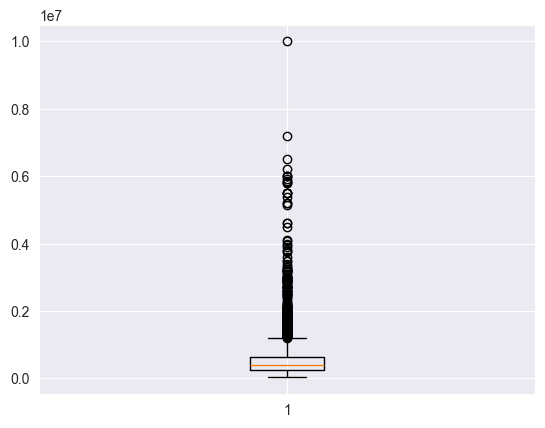

In [14]:
import matplotlib.pyplot as plt
plt.boxplot(df['selling_price'])
plt.show()

Algorithms like logic regression and linear regression try to reduce the average error by fitting to the data. Outliers can drastically shift the fitted line/ boundary hence reducing model accuracy significantly.

10. Remove cars that are priced below 10,000 or above 5,000,000 (possible outliers).
 Explain why setting realistic price limits can help improve model performance.


In [15]:
df = df.loc[(df['selling_price'] >= 20000) & (df['selling_price'] <= 5000000)]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   year                6906 non-null   int64  
 2   selling_price       6906 non-null   int64  
 3   km_driven           6906 non-null   int64  
 4   fuel                6906 non-null   object 
 5   seller_type         6906 non-null   object 
 6   transmission        6906 non-null   object 
 7   owner               6906 non-null   object 
 8   mileage(km/ltr/kg)  6906 non-null   float64
 9   engine              6698 non-null   float64
 10  max_power           6701 non-null   object 
 11  seats               6698 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 701.4+ KB


reason for setting realistic price limits
distribution normalization - outliers significantly skew data hence hard for the mode to learn. Removing them ensures the data is well normalized hence the learning algorithms learn better.
Variance reduction - outliers increase variance making it harder for model to establish consistent pattern.

11. Standardize the column names so they are all lowercase and contain underscores instead of spaces.


In [17]:
df = df.rename(columns= {'name': 'name', 'year': 'year', 'selling_price' : 'selling_price', 'km_driven' : 'km_driven', 'fuel' : 'fuel', 'seller_type' : 'seller_type', 'transmission' : 'transmission', 'owner' : 'owner', 'mileage(km/ltr/kg)' : 'mileage', 'engine' : 'engine', 'max_power' : 'max_power', 'seats' : 'seats'})
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


12. Check if any numerical columns are stored as strings and convert them to numbers.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6906 non-null   object 
 1   year           6906 non-null   int64  
 2   selling_price  6906 non-null   int64  
 3   km_driven      6906 non-null   int64  
 4   fuel           6906 non-null   object 
 5   seller_type    6906 non-null   object 
 6   transmission   6906 non-null   object 
 7   owner          6906 non-null   object 
 8   mileage        6906 non-null   float64
 9   engine         6698 non-null   float64
 10  max_power      6701 non-null   object 
 11  seats          6698 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 701.4+ KB


In [19]:
# converting max_power from an object to an integer
# mean_max_power = df['max_power'].mean()
df['max_power'] = df['max_power'].fillna('null')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6906 non-null   object 
 1   year           6906 non-null   int64  
 2   selling_price  6906 non-null   int64  
 3   km_driven      6906 non-null   int64  
 4   fuel           6906 non-null   object 
 5   seller_type    6906 non-null   object 
 6   transmission   6906 non-null   object 
 7   owner          6906 non-null   object 
 8   mileage        6906 non-null   float64
 9   engine         6698 non-null   float64
 10  max_power      6906 non-null   object 
 11  seats          6698 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 701.4+ KB


In [20]:

df['max_power'] = df['max_power'].astype(str).str.strip()  #remove leading/trailing spaces
df['max_power'] = df['max_power'].replace(['null', '', 'NULL', 'Null', 'nan'], 0)
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce').fillna(0)

In [21]:
df['max_power'] = df['max_power'].astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6906 non-null   object 
 1   year           6906 non-null   int64  
 2   selling_price  6906 non-null   int64  
 3   km_driven      6906 non-null   int64  
 4   fuel           6906 non-null   object 
 5   seller_type    6906 non-null   object 
 6   transmission   6906 non-null   object 
 7   owner          6906 non-null   object 
 8   mileage        6906 non-null   float64
 9   engine         6698 non-null   float64
 10  max_power      6906 non-null   float64
 11  seats          6698 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 701.4+ KB


13. Create a new column for “price per kilometer” by dividing the selling price by the mileage.


In [23]:
df['price_per_kg'] = df.apply(
    lambda row: 0 if row['mileage'] == 0 else row['selling_price'] / row['mileage'],
    axis=1
)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,price_per_kg
0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,17502.365184
2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,8926.553672
3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,9782.608696
4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,8074.534161


In [24]:
# remove the decimals in price per kg.
df['price_per_kg'] = df['price_per_kg'].astype(int)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,price_per_kg
0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,19230
1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,17502
2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,8926
3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,9782
4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,8074


14. Ensure the dataset index is properly reset after cleaning.

In [25]:
df = df.reset_index()
df.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,price_per_kg
0,0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,19230
1,1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,17502
2,2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,8926
3,3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,9782
4,4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,8074


Save your cleaned dataset as a new CSV file called cleaned_cars.csv.

In [26]:
df.to_csv('cleaned_cars.csv', index=False)

16. Find the average selling price of cars in the dataset.


In [27]:
# first open new csv as a dataframe
df = pd.read_csv(r"cleaned_cars.csv")
df.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,price_per_kg
0,0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,19230
1,1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,17502
2,2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,8926
3,3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,9782
4,4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,8074


In [28]:
# find the mean of the dataframe
avg_price = df['selling_price'].mean()
print(avg_price)

501378.18114682887


17. Find the most common fuel type in the dataset.


In [29]:
# find among the exiting options in the fuel type column which occurs most
fuel_order = df['fuel'].value_counts()
most_common = fuel_order.index[0]
print(fuel_order)
print( f" The most common fuel is {most_common}")

fuel
Diesel    3741
Petrol    3071
CNG         56
LPG         38
Name: count, dtype: int64
 The most common fuel is Diesel


Plot a histogram of the selling prices.


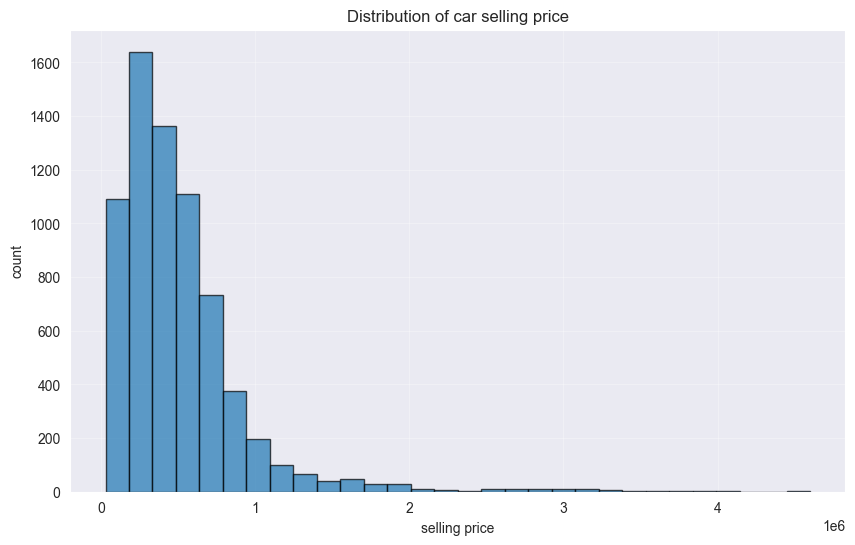

In [30]:

plt.figure(figsize = (10, 6))
plt.hist(df['selling_price'], bins = 30, edgecolor = 'black', alpha = 0.7)
plt.title('Distribution of car selling price')
plt.xlabel('selling price')
plt.ylabel('count')
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
plt.grid(True, alpha=0.3)

Plot the relationship between car age and selling price using a scatter plot.


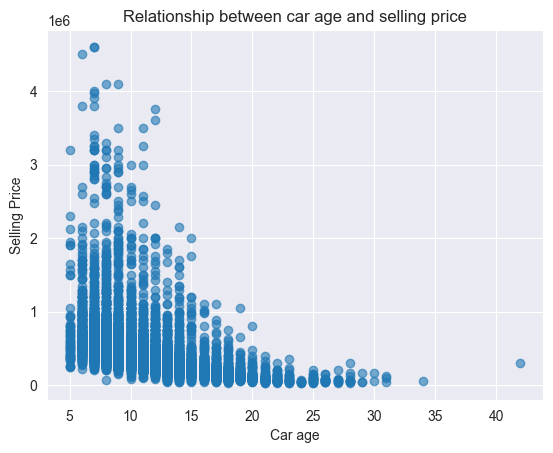

In [31]:
plt.scatter(df['year'], df['selling_price'], alpha = 0.6)
plt.title('Relationship between car age and selling price')
plt.xlabel('Car age')
plt.ylabel('Selling Price')
plt.show()

20. Group cars by fuel type and find the average selling price for each group.


In [32]:
# first group the cars
fuel_groups = df.groupby('fuel')

# find the average selling price
avg_sellingPrice = fuel_groups['selling_price'].mean()

# sort in descending order
avg_sellingPrice = avg_sellingPrice.sort_values(ascending = False)

print(avg_sellingPrice)


fuel
Diesel    620448.482224
Petrol    363717.339629
CNG       300499.946429
LPG       200421.052632
Name: selling_price, dtype: float64


21. Plot a bar chart showing the number of cars per transmission type.


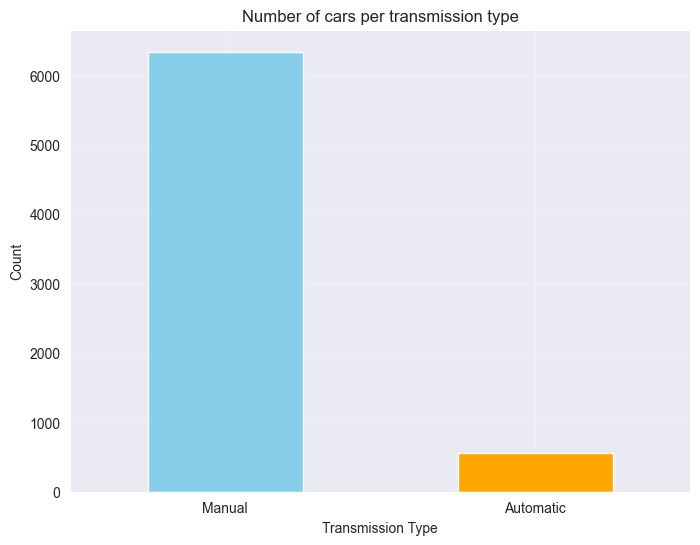

In [33]:
transmission_counts = df['transmission'].value_counts()
plt.figure(figsize = (8, 6))
transmission_counts.plot(kind = 'bar', color = ['skyblue', 'orange'])
plt.title('Number of cars per transmission type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.grid(True, alpha = 0.3)
plt.show()

22. Find the car with the highest mileage in the dataset.


In [34]:
# find the highest mileage value
highest_mileage_value = df['mileage'].idxmax()
# find the highest mileage car
highest_mileage_car = df.loc[highest_mileage_value]
print(f"The car with the highest mileage is {highest_mileage_car}")


The car with the highest mileage is index                                          35
name             Maruti Alto 800 CNG LXI Optional
year                                            6
selling_price                              330000
km_driven                                   10000
fuel                                          CNG
seller_type                            Individual
transmission                               Manual
owner                                Second Owner
mileage                                     33.44
engine                                      796.0
max_power                                    40.3
seats                                         4.0
price_per_kg                                 9868
Name: 35, dtype: object


23. Calculate the correlation between mileage and selling price.


In [35]:
correlation = df['mileage'].corr(df['selling_price'])
print(f"The correlation coefficient is {correlation:.4f}")


The correlation coefficient is -0.1207


24. Plot a heatmap showing the correlations between all numeric columns.


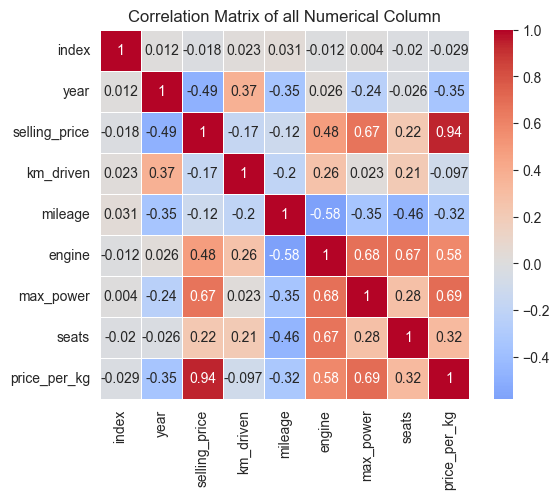

In [36]:
import seaborn as sns
import numpy as np
numeric_col = df.select_dtypes(include = [np.number]).columns
correlation_matrix = df[numeric_col].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of all Numerical Column')
plt.show()

25. Check if manual cars are generally cheaper or more expensive than automatic cars.


In [37]:
# first step, group by either auto or manual
transmission_group = df.groupby('transmission')
# find the median, mean and count in each
transmission_price = transmission_group['selling_price'].agg(['mean', 'median', 'count'])
print(transmission_price)

manual_average = transmission_price.loc['Manual', 'mean']
auto_average = transmission_price.loc['Automatic', 'mean']
print(manual_average)
print(auto_average)

                      mean    median  count
transmission                               
Automatic     1.143215e+06  800000.0    564
Manual        4.442991e+05  385000.0   6342
444299.07489750866
1143214.5141843972


We conclude that manual cars are generally cheaper

26. Find the average selling price for each year of manufacture.


In [40]:
#  group the data into years of manufacture and get the average
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 0 to 6905
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          6906 non-null   int64  
 1   name           6906 non-null   object 
 2   year           6906 non-null   int64  
 3   selling_price  6906 non-null   int64  
 4   km_driven      6906 non-null   int64  
 5   fuel           6906 non-null   object 
 6   seller_type    6906 non-null   object 
 7   transmission   6906 non-null   object 
 8   owner          6906 non-null   object 
 9   mileage        6906 non-null   float64
 10  engine         6698 non-null   float64
 11  max_power      6906 non-null   float64
 12  seats          6698 non-null   float64
 13  price_per_kg   6906 non-null   int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 755.5+ KB


,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,price_per_kg
0,0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,19230
1,1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,17502
2,2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,8926
3,3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,9782
4,4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,8074


In [41]:
year_groups = df.groupby('year')
year_groups_mean = year_groups['selling_price'].mean()
year_groups_mean = year_groups_mean.sort_index()
print(year_groups_mean)

year
5     786548.338710
6     795583.291667
7     825749.553897
8     708006.173913
9     653180.339105
10    589177.625551
11    511858.798623
12    451501.724199
13    351387.379139
14    318335.696751
15    273897.334211
16    227691.620833
17    208397.639024
18    174894.505682
19    164383.308943
20    137994.494505
21    109364.250000
22     97034.021277
23     99153.807692
24     47220.333333
25     90047.850000
26     71470.588235
27     73100.000000
28     90181.727273
29     81666.666667
30    107500.000000
31     88000.000000
34     55000.000000
42    300000.000000
Name: selling_price, dtype: float64


27. Plot a line chart showing the trend of selling prices over the years.


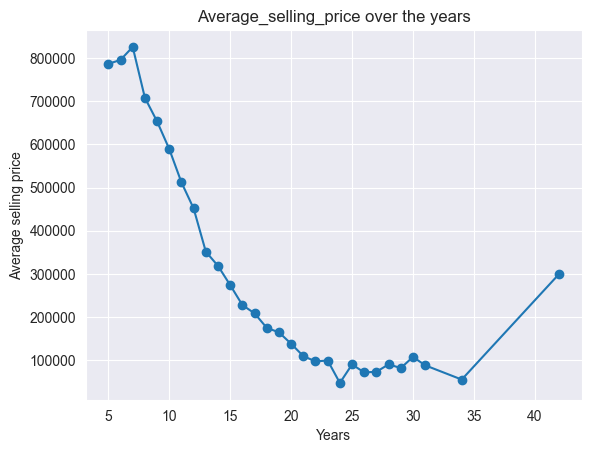

In [42]:
year_groups_mean.plot(kind ='line', marker = 'o')
plt.title("Average_selling_price over the years")
plt.xlabel('Years')
plt.ylabel('Average selling price')
plt.show()

28. Find the most expensive car for each fuel type.


In [46]:
# Group the data by fuel type.
# find most expensive for each type
fuel_groups = df.groupby('fuel')
most_exp = df.loc[fuel_groups['selling_price'].idxmax()]
print(most_exp)

      index                                      name  year  selling_price  \
4961   5749     Maruti Ertiga VXI CNG Limited Edition    11         545000   
283     288  Mercedes-Benz GL-Class 220d 4MATIC Sport     7        4600000   
2783   3042               Hyundai i10 Sportz 1.1L LPG    10         375000   
133     134           Jeep Wrangler 2016-2019 3.6 4X4     8        4100000   

      km_driven    fuel seller_type transmission        owner  mileage  \
4961      35000     CNG  Individual       Manual  First Owner     22.8   
283        7976  Diesel  Individual    Automatic  First Owner     17.9   
2783      60000     LPG  Individual       Manual  First Owner     19.2   
133       17000  Petrol  Individual    Automatic  First Owner      9.5   

      engine  max_power  seats  price_per_kg  
4961  1373.0      80.90    7.0         23903  
283   2143.0     170.00    5.0        256983  
2783  1086.0      68.05    5.0         19531  
133   3604.0     280.00    5.0        431578  


29. Find out which brand appears most frequently in the dataset.


In [47]:
df.head()
df.tail()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,price_per_kg
6901,8121,Maruti Wagon R VXI BS IV with ABS,12,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,13756
6902,8122,Hyundai i20 Magna 1.4 CRDi,11,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,21073
6903,8123,Hyundai i20 Magna,12,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,17297
6904,8124,Hyundai Verna CRDi SX,18,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,8035
6905,8125,Maruti Swift Dzire ZDi,16,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,19792


In [50]:
# check the names column to find out which string is common
brand_counts = df['name'].value_counts()
print(f"specific brand is {brand_counts.index[0]} with {brand_counts.iloc[0]} vehicles")
# divide the strings in column "name" and select the first word
first_word = df['name'].str.split().str[0]
# find out the top most occurence and by how many
word_count = first_word.value_counts()
most_common_word = word_count.index[0]
most_common_number = word_count.iloc[0]
print(f" The most common brand is {most_common_word} with {most_common_number} occurences")

specific brand is Maruti Swift Dzire VDI with 118 vehicles
 The most common brand is Maruti with 2165 occurences


30. Check the top 5 most common combinations of fuel type and transmission.


In [52]:
# Group by fuel_type and transmission
combinos = df.groupby(['fuel', 'transmission'])
# sort in descending order
new_combinos = combinos.size().sort_values(ascending = False)
print(new_combinos.head(5))


fuel    transmission
Diesel  Manual          3457
Petrol  Manual          2791
Diesel  Automatic        284
Petrol  Automatic        280
CNG     Manual            56
dtype: int64


Machine Learning (31–40)

31. What are the main assumptions of Linear Regression, and how can you check them using this dataset?
 Explain the assumptions (Linearity, Homoscedasticity, Normality of residuals, No multicollinearity, Independence of errors). Then, write code to verify at least three of these assumptions using visualizations or statistics.


Main assumptions inlude:
1 there exists a linear relationship between the independent variable (x axis) and the dependent variable(y axis) LINEARITY
2. the residuals(vertical distance between the actual value and predicted value) are normally distributed NORMALITY OF RESIDUALS
3. Variance of the residual is constant across all values of the independent variable(x_axis) HOMOSCEDASTICITY
4. there is no autocorrelation between errors INDEPENDENCE OF ERRORS
5. there is little to no correlation between independent variables. NO MULTICOLLINEARITY